# Breast (9,85,201)

## Describe

| Total | Positive | Attributes | Normalized |
|:-----:|:--------:|:----------:|:----------:|
|  569  |   0.37   |     30     |     Not    |

In [2]:
default_args = {
    'dataset': 'breast',
    'test_size': 0.15,
    'val_size': 0.1,
    'dropout': 0, 
    'normalize': True,
    'loss': 'bce',
    'activation': 'relu',
    'verbose': True,
}

## With Prior Equalization

### $e_0 = 0.1, e_1 = 0.3$

Logging to logs/nn/19-08-28-20-46-25
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.1, 'e1': 0.3, 'equalize_prior': True, 'episodes': 1000, 'alpha': 1.0}
acc:0.543	batchsize: 1	lr:0.0007	hidsize:[8, 8]
acc:0.558	batchsize: 1	lr:0.0007	hidsize:[16, 16]
acc:0.601	batchsize: 1	lr:0.0007	hidsize:[32, 32]
acc:0.582	batchsize: 1	lr:0.0007	hidsize:[64, 64]
acc:0.548	batchsize: 1	lr: 0.001	hidsize:[8, 8]
acc:0.558	batchsize: 1	lr: 0.001	hidsize:[16, 16]
acc:0.601	batchsize: 1	lr: 0.001	hidsize:[32, 32]
acc:0.582	batchsize: 1	lr: 0.001	hidsize:[64, 64]
acc:0.625	batchsize: 1	lr: 0.005	hidsize:[8, 8]
acc:0.577	batchsize: 1	lr: 0.005	hidsize:[16, 16]
acc:0.606	batchsize: 1	lr: 0.005	hidsize:[32, 32]
acc:0.587	batchsize: 1	lr: 0.005	hidsize:[64, 64]
acc:0.572	batchsize: 1	lr:  0.01	hidsize:[8, 8]
acc:0.572	batchsize: 1	lr:  0.01	hidsize:[16, 16]
acc:0.62	batchsize: 1	lr:  0.01	hidsize:[32, 32]

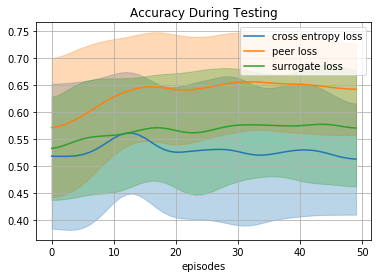

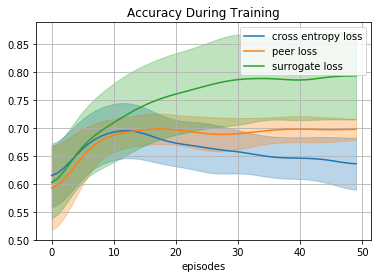

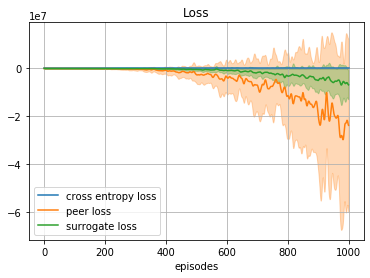

--------------------------------------
| [NN] with bce loss      | 0.519    |
| [NN] with peer loss     | 0.639    |
| [NN] with surrogate ... | 0.563    |
--------------------------------------
Logging to logs/svm/19-08-28-21-17-16
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.1, 'e1': 0.3, 'equalize_prior': True, 'episodes': 1000, 'alpha': 1.0}
--------------------------------
| [C-SVM] C1 = 0.1  | 0.603    |
| [C-SVM] C1 = 0.2  | 0.603    |
| [C-SVM] C1 = 0.25 | 0.603    |
| [C-SVM] C1 = 0.33 | 0.603    |
| [C-SVM] C1 = 0.5  | 0.603    |
| [C-SVM] C1 = 1.0  | 0.61     |
| [C-SVM] C1 = 10.0 | 0.456    |
| [C-SVM] C1 = 2.0  | 0.581    |
| [C-SVM] C1 = 3.0  | 0.515    |
| [C-SVM] C1 = 4.0  | 0.485    |
| [C-SVM] C1 = 5.0  | 0.471    |
--------------------------------
------------------------------------
| [C-SVM] accuracy max  | 0.731    |
| [C-SVM] accuracy mean | 0.529    |
| [C

In [7]:
from runner import run
args = default_args.copy()
args.update({
    'e0': 0.1, 'e1': 0.3, 
    'equalize_prior': True, 
    'episodes': 1000, 
#     'batchsize': 4, 
#     'hidsize': [16, 16], 
#     'lr': 0.005, 
    'alpha': 1.,
})
run(args)

### $e_0 = 0.2, e_1 = 0.2$

Logging to logs/nn/19-08-28-21-28-54
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.2, 'e1': 0.2, 'equalize_prior': True, 'episodes': 1000, 'alpha': 1.0}
acc:0.529	batchsize: 1	lr:0.0007	hidsize:[8, 8]
acc:0.582	batchsize: 1	lr:0.0007	hidsize:[16, 16]
acc:0.649	batchsize: 1	lr:0.0007	hidsize:[32, 32]
acc:0.587	batchsize: 1	lr:0.0007	hidsize:[64, 64]
acc:0.587	batchsize: 1	lr: 0.001	hidsize:[8, 8]
acc:0.572	batchsize: 1	lr: 0.001	hidsize:[16, 16]
acc:0.639	batchsize: 1	lr: 0.001	hidsize:[32, 32]
acc:0.587	batchsize: 1	lr: 0.001	hidsize:[64, 64]
acc:0.572	batchsize: 1	lr: 0.005	hidsize:[8, 8]
acc:0.606	batchsize: 1	lr: 0.005	hidsize:[16, 16]
acc:0.644	batchsize: 1	lr: 0.005	hidsize:[32, 32]
acc:0.615	batchsize: 1	lr: 0.005	hidsize:[64, 64]
acc:0.606	batchsize: 1	lr:  0.01	hidsize:[8, 8]
acc:0.615	batchsize: 1	lr:  0.01	hidsize:[16, 16]
acc:0.659	batchsize: 1	lr:  0.01	hidsize:[32, 32

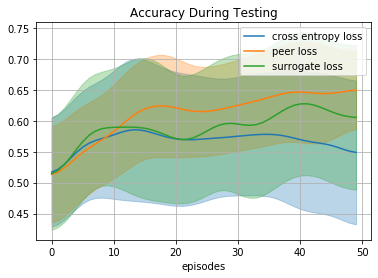

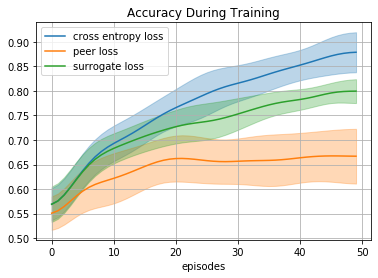

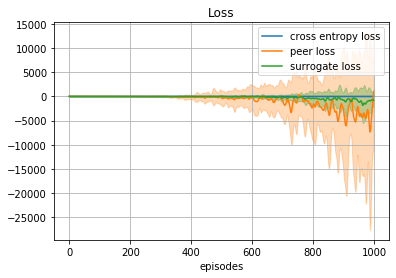

--------------------------------------
| [NN] with bce loss      | 0.534    |
| [NN] with peer loss     | 0.659    |
| [NN] with surrogate ... | 0.606    |
--------------------------------------
Logging to logs/svm/19-08-28-21-33-51
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.2, 'e1': 0.2, 'equalize_prior': True, 'episodes': 1000, 'alpha': 1.0}
--------------------------------
| [C-SVM] C1 = 0.1  | 0.485    |
| [C-SVM] C1 = 0.2  | 0.485    |
| [C-SVM] C1 = 0.25 | 0.485    |
| [C-SVM] C1 = 0.33 | 0.485    |
| [C-SVM] C1 = 0.5  | 0.493    |
| [C-SVM] C1 = 1.0  | 0.551    |
| [C-SVM] C1 = 10.0 | 0.515    |
| [C-SVM] C1 = 2.0  | 0.5      |
| [C-SVM] C1 = 3.0  | 0.515    |
| [C-SVM] C1 = 4.0  | 0.515    |
| [C-SVM] C1 = 5.0  | 0.515    |
--------------------------------
------------------------------------
| [C-SVM] accuracy max  | 0.731    |
| [C-SVM] accuracy mean | 0.615    |
| [C

In [13]:
from runner import run
args = default_args.copy()
args.update({
    'e0': 0.2, 'e1': 0.2, 
    'equalize_prior': True, 
    'episodes': 1000, 
#     'batchsize': 4, 
#     'hidsize': [16, 16], 
#     'lr': 0.005, 
    'alpha': 1.,
})
run(args)

### $e_0 = 0.1, e_1 = 0.4$

Logging to logs/nn/19-08-28-21-17-27
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.1, 'e1': 0.4, 'equalize_prior': True, 'episodes': 1000, 'batchsize': 4, 'hidsize': [16, 16], 'lr': 0.005, 'alpha': 1.0}


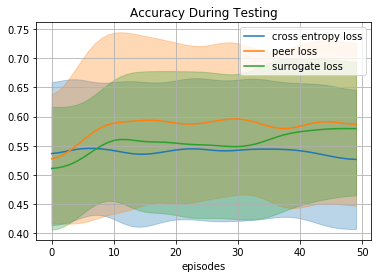

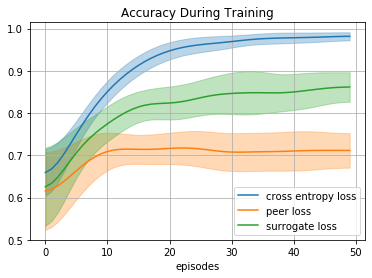

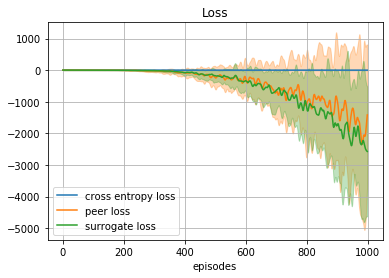

--------------------------------------
| [NN] with bce loss      | 0.519    |
| [NN] with peer loss     | 0.587    |
| [NN] with surrogate ... | 0.577    |
--------------------------------------
Logging to logs/svm/19-08-28-21-17-34
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.1, 'e1': 0.4, 'equalize_prior': True, 'episodes': 1000, 'batchsize': 4, 'hidsize': [16, 16], 'lr': 0.005, 'alpha': 1.0}
--------------------------------
| [C-SVM] C1 = 0.1  | 0.654    |
| [C-SVM] C1 = 0.2  | 0.654    |
| [C-SVM] C1 = 0.25 | 0.654    |
| [C-SVM] C1 = 0.33 | 0.654    |
| [C-SVM] C1 = 0.5  | 0.654    |
| [C-SVM] C1 = 1.0  | 0.662    |
| [C-SVM] C1 = 10.0 | 0.456    |
| [C-SVM] C1 = 2.0  | 0.61     |
| [C-SVM] C1 = 3.0  | 0.529    |
| [C-SVM] C1 = 4.0  | 0.471    |
| [C-SVM] C1 = 5.0  | 0.456    |
--------------------------------
------------------------------------
| [C-SVM] accuracy max  | 0.

In [9]:
from runner import run
args = default_args.copy()
args.update({
    'e0': 0.1, 'e1': 0.4, 
    'equalize_prior': True, 
    'episodes': 1000, 
    'batchsize': 4, 
    'hidsize': [16, 16], 
    'lr': 0.005, 
    'alpha': 1.,
})
run(args)

### $e_0 = 0.2, e_1 = 0.4$

Logging to logs/nn/19-08-28-21-23-21
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.2, 'e1': 0.4, 'equalize_prior': True, 'episodes': 1000, 'alpha': 1.0}
acc:0.529	batchsize: 1	lr:0.0007	hidsize:[8, 8]
acc:0.548	batchsize: 1	lr:0.0007	hidsize:[16, 16]
acc:0.572	batchsize: 1	lr:0.0007	hidsize:[32, 32]
acc:0.548	batchsize: 1	lr:0.0007	hidsize:[64, 64]
acc:0.524	batchsize: 1	lr: 0.001	hidsize:[8, 8]
acc:0.548	batchsize: 1	lr: 0.001	hidsize:[16, 16]
acc:0.562	batchsize: 1	lr: 0.001	hidsize:[32, 32]
acc:0.567	batchsize: 1	lr: 0.001	hidsize:[64, 64]
acc:0.562	batchsize: 1	lr: 0.005	hidsize:[8, 8]
acc:0.562	batchsize: 1	lr: 0.005	hidsize:[16, 16]
acc:0.577	batchsize: 1	lr: 0.005	hidsize:[32, 32]
acc:0.558	batchsize: 1	lr: 0.005	hidsize:[64, 64]
acc:0.572	batchsize: 1	lr:  0.01	hidsize:[8, 8]
acc:0.548	batchsize: 1	lr:  0.01	hidsize:[16, 16]
acc:0.567	batchsize: 1	lr:  0.01	hidsize:[32, 32

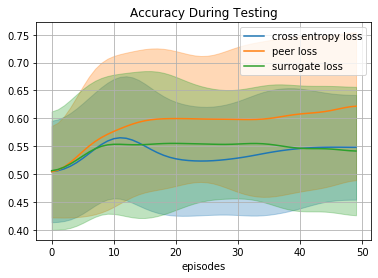

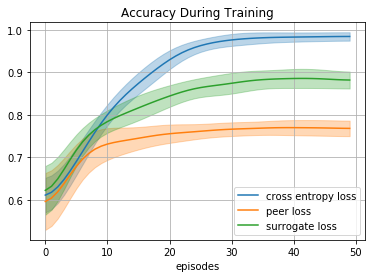

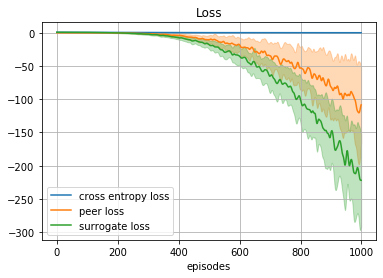

--------------------------------------
| [NN] with bce loss      | 0.538    |
| [NN] with peer loss     | 0.63     |
| [NN] with surrogate ... | 0.534    |
--------------------------------------
Logging to logs/svm/19-08-28-21-28-52
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.2, 'e1': 0.4, 'equalize_prior': True, 'episodes': 1000, 'alpha': 1.0}
--------------------------------
| [C-SVM] C1 = 0.1  | 0.596    |
| [C-SVM] C1 = 0.2  | 0.596    |
| [C-SVM] C1 = 0.25 | 0.596    |
| [C-SVM] C1 = 0.33 | 0.596    |
| [C-SVM] C1 = 0.5  | 0.596    |
| [C-SVM] C1 = 1.0  | 0.632    |
| [C-SVM] C1 = 10.0 | 0.463    |
| [C-SVM] C1 = 2.0  | 0.485    |
| [C-SVM] C1 = 3.0  | 0.478    |
| [C-SVM] C1 = 4.0  | 0.478    |
| [C-SVM] C1 = 5.0  | 0.471    |
--------------------------------
------------------------------------
| [C-SVM] accuracy max  | 0.692    |
| [C-SVM] accuracy mean | 0.538    |
| [C

In [12]:
from runner import run
args = default_args.copy()
args.update({
    'e0': 0.2, 'e1': 0.4, 
    'equalize_prior': True, 
    'episodes': 1000, 
#     'batchsize': 4, 
#     'hidsize': [16, 16], 
#     'lr': 0.005, 
    'alpha': 1.,
})
run(args)

### $e_0 = 0.4, e_1 = 0.4$

Logging to logs/nn/19-08-28-21-17-46
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.4, 'e1': 0.4, 'equalize_prior': True, 'episodes': 1000, 'alpha': 1.0}
acc:0.466	batchsize: 1	lr:0.0007	hidsize:[8, 8]
acc:0.514	batchsize: 1	lr:0.0007	hidsize:[16, 16]
acc:0.51	batchsize: 1	lr:0.0007	hidsize:[32, 32]
acc:0.519	batchsize: 1	lr:0.0007	hidsize:[64, 64]
acc:0.51	batchsize: 1	lr: 0.001	hidsize:[8, 8]
acc:0.519	batchsize: 1	lr: 0.001	hidsize:[16, 16]
acc: 0.5	batchsize: 1	lr: 0.001	hidsize:[32, 32]
acc:0.505	batchsize: 1	lr: 0.001	hidsize:[64, 64]
acc:0.519	batchsize: 1	lr: 0.005	hidsize:[8, 8]
acc: 0.5	batchsize: 1	lr: 0.005	hidsize:[16, 16]
acc:0.51	batchsize: 1	lr: 0.005	hidsize:[32, 32]
acc: 0.5	batchsize: 1	lr: 0.005	hidsize:[64, 64]
acc:0.471	batchsize: 1	lr:  0.01	hidsize:[8, 8]
acc:0.519	batchsize: 1	lr:  0.01	hidsize:[16, 16]
acc:0.534	batchsize: 1	lr:  0.01	hidsize:[32, 32]
acc:

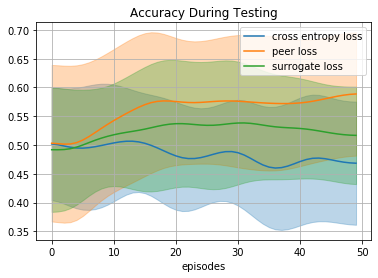

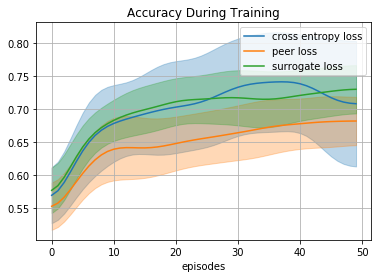

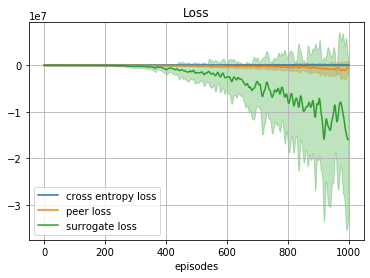

--------------------------------------
| [NN] with bce loss      | 0.471    |
| [NN] with peer loss     | 0.596    |
| [NN] with surrogate ... | 0.519    |
--------------------------------------
Logging to logs/svm/19-08-28-21-23-19
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.4, 'e1': 0.4, 'equalize_prior': True, 'episodes': 1000, 'alpha': 1.0}
--------------------------------
| [C-SVM] C1 = 0.1  | 0.5      |
| [C-SVM] C1 = 0.2  | 0.5      |
| [C-SVM] C1 = 0.25 | 0.5      |
| [C-SVM] C1 = 0.33 | 0.5      |
| [C-SVM] C1 = 0.5  | 0.493    |
| [C-SVM] C1 = 1.0  | 0.471    |
| [C-SVM] C1 = 10.0 | 0.493    |
| [C-SVM] C1 = 2.0  | 0.485    |
| [C-SVM] C1 = 3.0  | 0.493    |
| [C-SVM] C1 = 4.0  | 0.493    |
| [C-SVM] C1 = 5.0  | 0.493    |
--------------------------------
------------------------------------
| [C-SVM] accuracy max  | 0.654    |
| [C-SVM] accuracy mean | 0.51     |
| [C

In [11]:
from runner import run
args = default_args.copy()
args.update({
    'e0': 0.4, 'e1': 0.4, 
    'equalize_prior': True, 
    'episodes': 1000, 
#     'batchsize': 4, 
#     'hidsize': [16, 16], 
#     'lr': 0.005, 
    'alpha': 1.,
})
run(args)

## Without Prior Equalization

### $e_0 = 0.1, e_1 = 0.3$

In [9]:
from run_nn import find_best_alpha
args = default_args.copy()
args.update({
    'e0': 0.1, 'e1': 0.3, 
    'equalize_prior': False, 
    'episodes': 1000, 
    'batchsize': 4, 
    'hidsize': [8, 8], 
    'lr': 0.01, 
})
find_best_alpha(args)

---------------------------------
| [PEER] alpha = 0.1 | 0.686    |
| [PEER] alpha = 0.2 | 0.669    |
| [PEER] alpha = 0.3 | 0.698    |
| [PEER] alpha = 0.4 | 0.689    |
| [PEER] alpha = 0.5 | 0.703    |
| [PEER] alpha = 0.6 | 0.733    |
| [PEER] alpha = 0.7 | 0.709    |
| [PEER] alpha = 0.8 | 0.73     |
| [PEER] alpha = 0.9 | 0.712    |
| [PEER] alpha = 1.0 | 0.727    |
---------------------------------


{'alpha': 0.6}

Logging to logs/nn/19-08-28-22-53-44
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.1, 'e1': 0.3, 'equalize_prior': False, 'episodes': 1000}
acc:0.613	batchsize: 1	lr:0.0007	hidsize:[8, 8]
acc:0.605	batchsize: 1	lr:0.0007	hidsize:[16, 16]
acc:0.666	batchsize: 1	lr:0.0007	hidsize:[32, 32]
acc:0.66	batchsize: 1	lr:0.0007	hidsize:[64, 64]
acc:0.637	batchsize: 1	lr: 0.001	hidsize:[8, 8]
acc:0.619	batchsize: 1	lr: 0.001	hidsize:[16, 16]
acc:0.677	batchsize: 1	lr: 0.001	hidsize:[32, 32]
acc:0.674	batchsize: 1	lr: 0.001	hidsize:[64, 64]
acc:0.712	batchsize: 1	lr: 0.005	hidsize:[8, 8]
acc:0.654	batchsize: 1	lr: 0.005	hidsize:[16, 16]
acc:0.683	batchsize: 1	lr: 0.005	hidsize:[32, 32]
acc:0.677	batchsize: 1	lr: 0.005	hidsize:[64, 64]
acc:0.712	batchsize: 1	lr:  0.01	hidsize:[8, 8]
acc:0.631	batchsize: 1	lr:  0.01	hidsize:[16, 16]
acc:0.672	batchsize: 1	lr:  0.01	hidsize:[32, 32]
acc:0.666	ba

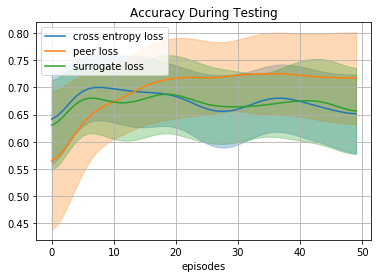

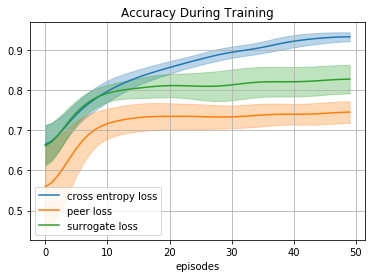

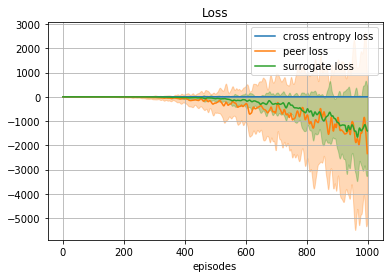

--------------------------------------
| [NN] with bce loss      | 0.648    |
| [NN] with peer loss     | 0.712    |
| [NN] with surrogate ... | 0.645    |
| [PEER] best alpha       | 0.9      |
--------------------------------------
Logging to logs/svm/19-08-28-22-59-21
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.1, 'e1': 0.3, 'equalize_prior': False, 'episodes': 1000}
--------------------------------
| [C-SVM] C1 = 0.1  | 0.72     |
| [C-SVM] C1 = 0.2  | 0.72     |
| [C-SVM] C1 = 0.25 | 0.72     |
| [C-SVM] C1 = 0.33 | 0.72     |
| [C-SVM] C1 = 0.5  | 0.72     |
| [C-SVM] C1 = 1.0  | 0.707    |
| [C-SVM] C1 = 10.0 | 0.543    |
| [C-SVM] C1 = 2.0  | 0.703    |
| [C-SVM] C1 = 3.0  | 0.608    |
| [C-SVM] C1 = 4.0  | 0.569    |
| [C-SVM] C1 = 5.0  | 0.565    |
--------------------------------
------------------------------------
| [C-SVM] accuracy max  | 0.814    |
| [C-SVM] accur

In [7]:
from runner import run
args = default_args.copy()
args.update({
    'e0': 0.1, 'e1': 0.3, 
    'equalize_prior': False, 
    'episodes': 1000, 
#     'batchsize': 32, 
#     'hidsize': [8, 8], 
#     'lr': 0.005, 
})
run(args)

### $e_0 = 0.2, e_1 = 0.2$

In [14]:
from run_nn import find_best_alpha
args = default_args.copy()
args.update({
    'e0': 0.2, 'e1': 0.2, 
    'equalize_prior': False, 
    'episodes': 1000, 
    'batchsize': 32, 
    'hidsize': [8, 8], 
    'lr': 0.01, 
})
find_best_alpha(args)

---------------------------------
| [PEER] alpha = 0.1 | 0.61     |
| [PEER] alpha = 0.2 | 0.605    |
| [PEER] alpha = 0.3 | 0.608    |
| [PEER] alpha = 0.4 | 0.616    |
| [PEER] alpha = 0.5 | 0.61     |
| [PEER] alpha = 0.6 | 0.645    |
| [PEER] alpha = 0.7 | 0.648    |
| [PEER] alpha = 0.8 | 0.666    |
| [PEER] alpha = 0.9 | 0.672    |
| [PEER] alpha = 1.0 | 0.698    |
---------------------------------


{'alpha': 1.0}

Logging to logs/nn/19-08-28-23-37-29
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.2, 'e1': 0.2, 'equalize_prior': False, 'episodes': 1000}
acc:0.613	batchsize: 1	lr:0.0007	hidsize:[8, 8]
acc:0.605	batchsize: 1	lr:0.0007	hidsize:[16, 16]
acc:0.66	batchsize: 1	lr:0.0007	hidsize:[32, 32]
acc:0.651	batchsize: 1	lr:0.0007	hidsize:[64, 64]
acc:0.631	batchsize: 1	lr: 0.001	hidsize:[8, 8]
acc:0.605	batchsize: 1	lr: 0.001	hidsize:[16, 16]
acc:0.666	batchsize: 1	lr: 0.001	hidsize:[32, 32]
acc:0.68	batchsize: 1	lr: 0.001	hidsize:[64, 64]
acc:0.672	batchsize: 1	lr: 0.005	hidsize:[8, 8]
acc:0.651	batchsize: 1	lr: 0.005	hidsize:[16, 16]
acc:0.689	batchsize: 1	lr: 0.005	hidsize:[32, 32]
acc:0.669	batchsize: 1	lr: 0.005	hidsize:[64, 64]
acc:0.651	batchsize: 1	lr:  0.01	hidsize:[8, 8]
acc:0.608	batchsize: 1	lr:  0.01	hidsize:[16, 16]
acc:0.674	batchsize: 1	lr:  0.01	hidsize:[32, 32]
acc:0.674	bat

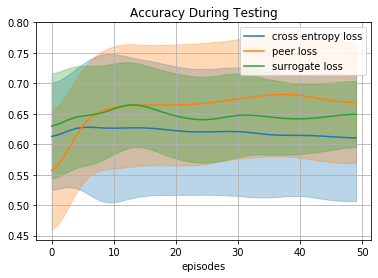

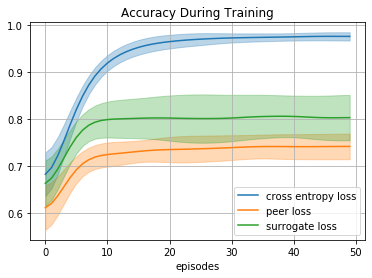

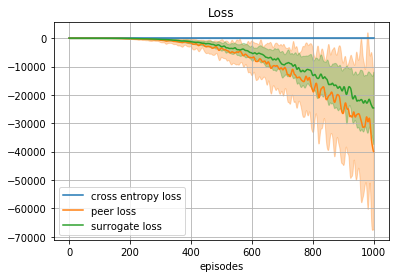

--------------------------------------
| [NN] with bce loss      | 0.602    |
| [NN] with peer loss     | 0.672    |
| [NN] with surrogate ... | 0.654    |
| [PEER] best alpha       | 0.9      |
--------------------------------------
Logging to logs/svm/19-08-28-23-43-21
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.2, 'e1': 0.2, 'equalize_prior': False, 'episodes': 1000}
--------------------------------
| [C-SVM] C1 = 0.1  | 0.621    |
| [C-SVM] C1 = 0.2  | 0.621    |
| [C-SVM] C1 = 0.25 | 0.621    |
| [C-SVM] C1 = 0.33 | 0.621    |
| [C-SVM] C1 = 0.5  | 0.625    |
| [C-SVM] C1 = 1.0  | 0.612    |
| [C-SVM] C1 = 10.0 | 0.47     |
| [C-SVM] C1 = 2.0  | 0.504    |
| [C-SVM] C1 = 3.0  | 0.47     |
| [C-SVM] C1 = 4.0  | 0.474    |
| [C-SVM] C1 = 5.0  | 0.47     |
--------------------------------
------------------------------------
| [C-SVM] accuracy max  | 0.814    |
| [C-SVM] accur

In [10]:
from runner import run
args = default_args.copy()
args.update({
    'e0': 0.2, 'e1': 0.2, 
    'equalize_prior': False, 
    'episodes': 1000, 
#     'batchsize': 4, 
#     'hidsize': [64, 64], 
#     'lr': 0.01, 
})
run(args)

### $e_0 = 0.1, e_1 = 0.4$

In [16]:
from run_nn import find_best_alpha
args = default_args.copy()
args.update({
    'e0': 0.1, 'e1': 0.4, 
    'equalize_prior': False, 
    'episodes': 1000, 
    'batchsize': 4, 
    'hidsize': [8, 8], 
    'lr': 0.05, 
})
find_best_alpha(args)

---------------------------------
| [PEER] alpha = 0.1 | 0.695    |
| [PEER] alpha = 0.2 | 0.68     |
| [PEER] alpha = 0.3 | 0.645    |
| [PEER] alpha = 0.4 | 0.648    |
| [PEER] alpha = 0.5 | 0.669    |
| [PEER] alpha = 0.6 | 0.674    |
| [PEER] alpha = 0.7 | 0.706    |
| [PEER] alpha = 0.8 | 0.703    |
| [PEER] alpha = 0.9 | 0.706    |
| [PEER] alpha = 1.0 | 0.735    |
---------------------------------


{'alpha': 1.0}

Logging to logs/nn/19-08-28-23-43-25
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.1, 'e1': 0.4, 'equalize_prior': False, 'episodes': 1000}
acc:0.613	batchsize: 1	lr:0.0007	hidsize:[8, 8]
acc:0.602	batchsize: 1	lr:0.0007	hidsize:[16, 16]
acc:0.68	batchsize: 1	lr:0.0007	hidsize:[32, 32]
acc:0.648	batchsize: 1	lr:0.0007	hidsize:[64, 64]
acc:0.634	batchsize: 1	lr: 0.001	hidsize:[8, 8]
acc:0.634	batchsize: 1	lr: 0.001	hidsize:[16, 16]
acc:0.692	batchsize: 1	lr: 0.001	hidsize:[32, 32]
acc:0.683	batchsize: 1	lr: 0.001	hidsize:[64, 64]
acc:0.68	batchsize: 1	lr: 0.005	hidsize:[8, 8]
acc:0.68	batchsize: 1	lr: 0.005	hidsize:[16, 16]
acc:0.724	batchsize: 1	lr: 0.005	hidsize:[32, 32]
acc:0.709	batchsize: 1	lr: 0.005	hidsize:[64, 64]
acc:0.712	batchsize: 1	lr:  0.01	hidsize:[8, 8]
acc:0.663	batchsize: 1	lr:  0.01	hidsize:[16, 16]
acc:0.733	batchsize: 1	lr:  0.01	hidsize:[32, 32]
acc:0.712	batc

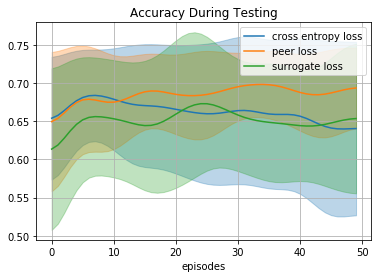

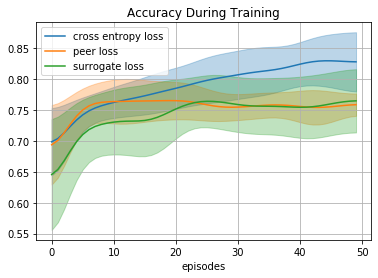

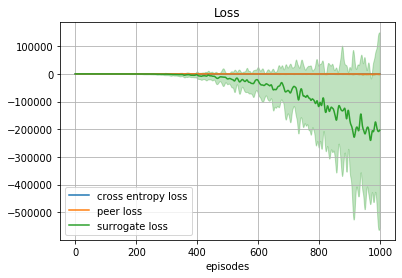

--------------------------------------
| [NN] with bce loss      | 0.66     |
| [NN] with peer loss     | 0.695    |
| [NN] with surrogate ... | 0.654    |
| [PEER] best alpha       | 0.1      |
--------------------------------------
Logging to logs/svm/19-08-28-23-49-18
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.1, 'e1': 0.4, 'equalize_prior': False, 'episodes': 1000}
--------------------------------
| [C-SVM] C1 = 0.1  | 0.746    |
| [C-SVM] C1 = 0.2  | 0.746    |
| [C-SVM] C1 = 0.25 | 0.746    |
| [C-SVM] C1 = 0.33 | 0.746    |
| [C-SVM] C1 = 0.5  | 0.746    |
| [C-SVM] C1 = 1.0  | 0.746    |
| [C-SVM] C1 = 10.0 | 0.569    |
| [C-SVM] C1 = 2.0  | 0.72     |
| [C-SVM] C1 = 3.0  | 0.647    |
| [C-SVM] C1 = 4.0  | 0.595    |
| [C-SVM] C1 = 5.0  | 0.578    |
--------------------------------
------------------------------------
| [C-SVM] accuracy max  | 0.814    |
| [C-SVM] accur

In [11]:
from runner import run
args = default_args.copy()
args.update({
    'e0': 0.1, 'e1': 0.4, 
    'equalize_prior': False, 
    'episodes': 1000, 
#     'batchsize': 64, 
#     'hidsize': [8, 8], 
#     'lr': 0.001, 
})
run(args)

### $e_0 = 0.2, e_1 = 0.4$

In [19]:
from run_nn import find_best_alpha
args = default_args.copy()
args.update({
    'e0': 0.2, 'e1': 0.4, 
    'equalize_prior': False, 
    'episodes': 1000, 
    'batchsize': 1, 
    'hidsize': [8, 8], 
    'lr': 0.005, 
})
find_best_alpha(args)

---------------------------------
| [PEER] alpha = 0.1 | 0.663    |
| [PEER] alpha = 0.2 | 0.642    |
| [PEER] alpha = 0.3 | 0.645    |
| [PEER] alpha = 0.4 | 0.657    |
| [PEER] alpha = 0.5 | 0.674    |
| [PEER] alpha = 0.6 | 0.66     |
| [PEER] alpha = 0.7 | 0.718    |
| [PEER] alpha = 0.8 | 0.68     |
| [PEER] alpha = 0.9 | 0.689    |
| [PEER] alpha = 1.0 | 0.73     |
---------------------------------


{'alpha': 1.0}

Logging to logs/nn/19-08-29-00-03-28
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.2, 'e1': 0.4, 'equalize_prior': False, 'episodes': 1000}
acc:0.61	batchsize: 1	lr:0.0007	hidsize:[8, 8]
acc:0.605	batchsize: 1	lr:0.0007	hidsize:[16, 16]
acc:0.663	batchsize: 1	lr:0.0007	hidsize:[32, 32]
acc:0.674	batchsize: 1	lr:0.0007	hidsize:[64, 64]
acc:0.637	batchsize: 1	lr: 0.001	hidsize:[8, 8]
acc:0.605	batchsize: 1	lr: 0.001	hidsize:[16, 16]
acc:0.674	batchsize: 1	lr: 0.001	hidsize:[32, 32]
acc:0.677	batchsize: 1	lr: 0.001	hidsize:[64, 64]
acc:0.73	batchsize: 1	lr: 0.005	hidsize:[8, 8]
acc:0.674	batchsize: 1	lr: 0.005	hidsize:[16, 16]
acc:0.683	batchsize: 1	lr: 0.005	hidsize:[32, 32]
acc:0.683	batchsize: 1	lr: 0.005	hidsize:[64, 64]
acc:0.724	batchsize: 1	lr:  0.01	hidsize:[8, 8]
acc:0.669	batchsize: 1	lr:  0.01	hidsize:[16, 16]
acc:0.674	batchsize: 1	lr:  0.01	hidsize:[32, 32]
acc:0.68	batc

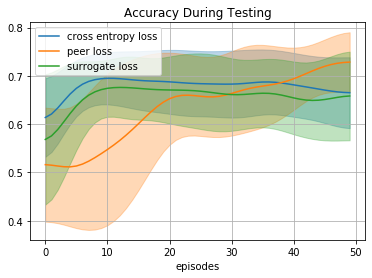

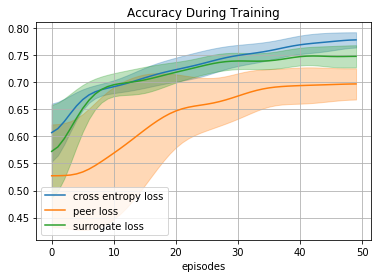

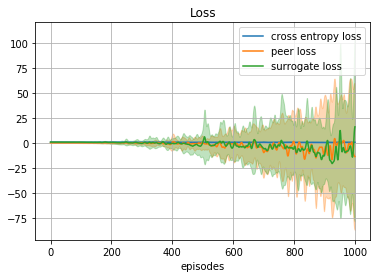

--------------------------------------
| [NN] with bce loss      | 0.672    |
| [NN] with peer loss     | 0.73     |
| [NN] with surrogate ... | 0.674    |
| [PEER] best alpha       | 1        |
--------------------------------------
Logging to logs/svm/19-08-29-00-09-26
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.2, 'e1': 0.4, 'equalize_prior': False, 'episodes': 1000}
--------------------------------
| [C-SVM] C1 = 0.1  | 0.677    |
| [C-SVM] C1 = 0.2  | 0.677    |
| [C-SVM] C1 = 0.25 | 0.677    |
| [C-SVM] C1 = 0.33 | 0.677    |
| [C-SVM] C1 = 0.5  | 0.677    |
| [C-SVM] C1 = 1.0  | 0.668    |
| [C-SVM] C1 = 10.0 | 0.487    |
| [C-SVM] C1 = 2.0  | 0.578    |
| [C-SVM] C1 = 3.0  | 0.534    |
| [C-SVM] C1 = 4.0  | 0.509    |
| [C-SVM] C1 = 5.0  | 0.496    |
--------------------------------
------------------------------------
| [C-SVM] accuracy max  | 0.814    |
| [C-SVM] accur

In [17]:
from runner import run
args = default_args.copy()
args.update({
    'e0': 0.2, 'e1': 0.4, 
    'equalize_prior': False, 
    'episodes': 1000, 
#     'batchsize': 64, 
#     'hidsize': [8, 8], 
#     'lr': 0.001, 
})
run(args)

### $e_0 = 0.4, e_1 = 0.4$

In [18]:
from run_nn import find_best_alpha
args = default_args.copy()
args.update({
    'e0': 0.4, 'e1': 0.4, 
    'equalize_prior': False, 
    'episodes': 1000, 
    'batchsize': 1, 
    'hidsize': [8, 8], 
    'lr': 0.005, 
})
find_best_alpha(args)

---------------------------------
| [PEER] alpha = 0.1 | 0.593    |
| [PEER] alpha = 0.2 | 0.59     |
| [PEER] alpha = 0.3 | 0.578    |
| [PEER] alpha = 0.4 | 0.587    |
| [PEER] alpha = 0.5 | 0.616    |
| [PEER] alpha = 0.6 | 0.631    |
| [PEER] alpha = 0.7 | 0.645    |
| [PEER] alpha = 0.8 | 0.677    |
| [PEER] alpha = 0.9 | 0.677    |
| [PEER] alpha = 1.0 | 0.669    |
---------------------------------


{'alpha': 0.8}

Logging to logs/nn/19-08-28-23-55-06
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.4, 'e1': 0.4, 'equalize_prior': False, 'episodes': 1000}
acc:0.596	batchsize: 1	lr:0.0007	hidsize:[8, 8]
acc:0.596	batchsize: 1	lr:0.0007	hidsize:[16, 16]
acc:0.645	batchsize: 1	lr:0.0007	hidsize:[32, 32]
acc:0.628	batchsize: 1	lr:0.0007	hidsize:[64, 64]
acc:0.651	batchsize: 1	lr: 0.001	hidsize:[8, 8]
acc:0.619	batchsize: 1	lr: 0.001	hidsize:[16, 16]
acc:0.645	batchsize: 1	lr: 0.001	hidsize:[32, 32]
acc:0.593	batchsize: 1	lr: 0.001	hidsize:[64, 64]
acc:0.669	batchsize: 1	lr: 0.005	hidsize:[8, 8]
acc:0.634	batchsize: 1	lr: 0.005	hidsize:[16, 16]
acc:0.651	batchsize: 1	lr: 0.005	hidsize:[32, 32]
acc:0.628	batchsize: 1	lr: 0.005	hidsize:[64, 64]
acc:0.642	batchsize: 1	lr:  0.01	hidsize:[8, 8]
acc:0.663	batchsize: 1	lr:  0.01	hidsize:[16, 16]
acc:0.637	batchsize: 1	lr:  0.01	hidsize:[32, 32]
acc:0.654	b

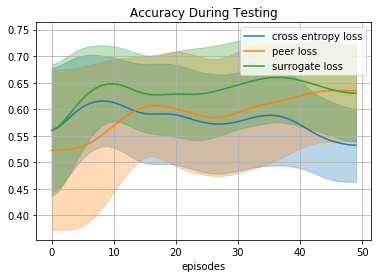

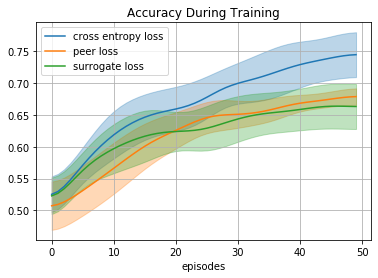

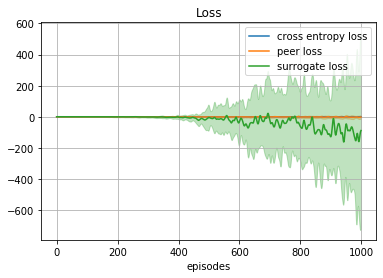

--------------------------------------
| [NN] with bce loss      | 0.529    |
| [NN] with peer loss     | 0.645    |
| [NN] with surrogate ... | 0.628    |
| [PEER] best alpha       | 0.7      |
--------------------------------------
Logging to logs/svm/19-08-29-00-00-57
{'dataset': 'breast', 'test_size': 0.15, 'val_size': 0.1, 'dropout': 0, 'normalize': True, 'loss': 'bce', 'activation': 'relu', 'verbose': True, 'e0': 0.4, 'e1': 0.4, 'equalize_prior': False, 'episodes': 1000}
--------------------------------
| [C-SVM] C1 = 0.1  | 0.539    |
| [C-SVM] C1 = 0.2  | 0.539    |
| [C-SVM] C1 = 0.25 | 0.539    |
| [C-SVM] C1 = 0.33 | 0.539    |
| [C-SVM] C1 = 0.5  | 0.53     |
| [C-SVM] C1 = 1.0  | 0.522    |
| [C-SVM] C1 = 10.0 | 0.47     |
| [C-SVM] C1 = 2.0  | 0.517    |
| [C-SVM] C1 = 3.0  | 0.483    |
| [C-SVM] C1 = 4.0  | 0.474    |
| [C-SVM] C1 = 5.0  | 0.47     |
--------------------------------
------------------------------------
| [C-SVM] accuracy max  | 0.814    |
| [C-SVM] accur

In [13]:
from runner import run

args = default_args.copy()
args.update({
    'dataset': 'breast', 
    'e0': 0.4, 'e1': 0.4, 
    'equalize_prior': False, 
    'episodes': 1000, 
#     'batchsize': 4, 
#     'hidsize': [8, 8], 
#     'lr': 0.01
})
run(args)